In [195]:
import pandas as pd

In [446]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from sqlalchemy import create_engine

In [364]:
engine=create_engine('sqlite://',echo=False)

### here we created two dataframes for the period before COVID and after COVID happend

In [197]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [191102, 191109, 191116,191123,191130,191207,191214,191221,191228]
turnstiles_df_before = get_data(week_nums)

In [198]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [201107,201114,201121,201128,201205,201212,201219,201226]
turnstiles_df_after = get_data(week_nums)

In [199]:
turnstiles_df_before.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679


In [200]:
turnstiles_df_after.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,00:00:00,REGULAR,7481098,2545767
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,04:00:00,REGULAR,7481103,2545767
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,08:00:00,REGULAR,7481117,2545786
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,12:00:00,REGULAR,7481158,2545831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,16:00:00,REGULAR,7481285,2545868


In [201]:
turnstiles_df_before.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [202]:
turnstiles_df_after.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [203]:
turnstiles_df_before.columns = [column.strip() for column in turnstiles_df_before.columns]
turnstiles_df_before.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [204]:
turnstiles_df_after.columns = [column.strip() for column in turnstiles_df_after.columns]
turnstiles_df_after.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [205]:
turnstiles_df_before.DATE.value_counts().sort_index()

10/26/2019    29229
10/27/2019    29338
10/28/2019    29426
10/29/2019    29832
10/30/2019    29319
              ...  
12/23/2019    29709
12/24/2019    29954
12/25/2019    29471
12/26/2019    29466
12/27/2019    29423
Name: DATE, Length: 63, dtype: int64

In [206]:
turnstiles_df_after.DATE.value_counts().sort_index()

10/31/2020    31374
11/01/2020    32395
11/02/2020    30058
11/03/2020    29752
11/04/2020    29765
11/05/2020    29682
11/06/2020    30079
11/07/2020    30139
11/08/2020    29720
11/09/2020    29631
11/10/2020    29695
11/11/2020    29765
11/12/2020    29674
11/13/2020    30152
11/14/2020    29904
11/15/2020    29965
11/16/2020    30070
11/17/2020    30071
11/18/2020    29881
11/19/2020    29999
11/20/2020    30367
11/21/2020    29807
11/22/2020    29741
11/23/2020    30736
11/24/2020    29708
11/25/2020    29695
11/26/2020    29826
11/27/2020    30265
11/28/2020    30061
11/29/2020    30289
11/30/2020    29723
12/01/2020    29762
12/02/2020    29975
12/03/2020    29820
12/04/2020    30150
12/05/2020    30286
12/06/2020    29950
12/07/2020    30147
12/08/2020    29947
12/09/2020    29973
12/10/2020    29940
12/11/2020    30160
12/12/2020    30557
12/13/2020    30067
12/14/2020    29942
12/15/2020    29784
12/16/2020    29824
12/17/2020    29729
12/18/2020    31019
12/19/2020    31271


In [207]:
turnstiles_df_before.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [208]:
turnstiles_df_after.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

### the shape of each dataframe we created

In [209]:
turnstiles_df_before.shape

(1855144, 11)

In [210]:
turnstiles_df_after.shape

(1685320, 11)

In [211]:
turnstiles_df_before["DATE_TIME"] = pd.to_datetime(turnstiles_df_before.DATE + " " + turnstiles_df_before.TIME, 
                                                   format="%m/%d/%Y %H:%M:%S")

In [212]:
turnstiles_df_after["DATE_TIME"] = pd.to_datetime(turnstiles_df_after.DATE + " " + turnstiles_df_after.TIME,
                                                  format="%m/%d/%Y %H:%M:%S")

In [213]:
turnstiles_df_before['DATE_TIME'].dtypes

dtype('<M8[ns]')

In [214]:
turnstiles_df_after['DATE_TIME'].dtypes

dtype('<M8[ns]')

In [215]:
turnstiles_df_before.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491,2019-10-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00


In [216]:
turnstiles_df_after.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,00:00:00,REGULAR,7481098,2545767,2020-10-31 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,04:00:00,REGULAR,7481103,2545767,2020-10-31 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,08:00:00,REGULAR,7481117,2545786,2020-10-31 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,12:00:00,REGULAR,7481158,2545831,2020-10-31 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,16:00:00,REGULAR,7481285,2545868,2020-10-31 16:00:00


### to see if there is duplicates and then remove them

In [217]:
(turnstiles_df_before
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1447786,R240,R047,00-03-04,GRD CNTRL-42 ST,2019-11-26 16:00:00,2
1668542,R514,R094,00-05-00,ASTORIA BLVD,2019-12-16 15:00:00,2
1522420,R285,R308,00-00-00,MT EDEN AV,2019-11-03 03:00:00,2
1522421,R285,R308,00-00-00,MT EDEN AV,2019-11-03 07:00:00,2
1522422,R285,R308,00-00-00,MT EDEN AV,2019-11-03 11:00:00,2
1522423,R285,R308,00-00-00,MT EDEN AV,2019-11-03 15:00:00,2
1522424,R285,R308,00-00-00,MT EDEN AV,2019-11-03 19:00:00,2
1522425,R285,R308,00-00-00,MT EDEN AV,2019-11-03 23:00:00,2
1522426,R285,R308,00-00-00,MT EDEN AV,2019-11-04 03:00:00,2
1522418,R285,R308,00-00-00,MT EDEN AV,2019-11-02 20:00:00,2


In [218]:
(turnstiles_df_after
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=True)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-10-31 00:00:00,1
1123550,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 17:00:00,1
1123549,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 13:00:00,1
1123548,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 09:00:00,1
1123547,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 05:00:00,1
1123546,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 01:00:00,1
1123545,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 21:00:00,1
1123544,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 17:00:00,1
1123543,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 13:00:00,1
1123542,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 09:00:00,1


In [447]:
mask = ((turnstiles_df_before["C/A"] == "N045") & 
(turnstiles_df_before["UNIT"] == "R187") & 
(turnstiles_df_before["SCP"] == "01-00-00") & 
(turnstiles_df_before["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df_before["DATE_TIME"].dt.date == datetime.datetime(2019, 11, 26).date()))
turnstiles_df_before[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
49443,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/26/2019,20:00:00,REGULAR,5434152,6888557,2019-11-26 20:00:00
49442,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/26/2019,16:00:00,REGULAR,5433681,6888336,2019-11-26 16:00:00
49441,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/26/2019,12:00:00,REGULAR,5433306,6888083,2019-11-26 12:00:00
49440,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/26/2019,08:00:00,REGULAR,5433235,6887532,2019-11-26 08:00:00
49439,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/26/2019,04:00:00,REGULAR,5433226,6887404,2019-11-26 04:00:00
49438,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/26/2019,00:00:00,REGULAR,5433224,6887401,2019-11-26 00:00:00


In [448]:
mask = ((turnstiles_df_after["C/A"] == "N045") & 
(turnstiles_df_after["UNIT"] == "R187") & 
(turnstiles_df_after["SCP"] == "01-00-00") & 
(turnstiles_df_after["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df_after["DATE_TIME"].dt.date == datetime.datetime(2020, 11, 28).date()))
turnstiles_df_after[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
51622,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,20:00:00,REGULAR,5551337,7057838,2020-11-28 20:00:00
51621,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,16:00:00,REGULAR,5551278,7057782,2020-11-28 16:00:00
51620,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,12:00:00,REGULAR,5551227,7057594,2020-11-28 12:00:00
51619,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,08:00:00,REGULAR,5551221,7057480,2020-11-28 08:00:00
51618,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,04:00:00,REGULAR,5551221,7057466,2020-11-28 04:00:00
51617,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,00:00:00,REGULAR,5551220,7057462,2020-11-28 00:00:00


In [449]:
turnstiles_df_before.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df_before.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [450]:
turnstiles_df_after.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df_after.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [451]:
(turnstiles_df_before
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-10-26 00:00:00,1
1236703,R138,R293,00-02-03,34 ST-PENN STA,2019-10-29 06:00:00,1
1236729,R138,R293,00-02-03,34 ST-PENN STA,2019-11-02 14:00:00,1
1236728,R138,R293,00-02-03,34 ST-PENN STA,2019-11-02 10:00:00,1
1236727,R138,R293,00-02-03,34 ST-PENN STA,2019-11-02 06:00:00,1


In [452]:
(turnstiles_df_after
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-10-31 00:00:00,1
1123541,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 05:00:00,1
1123551,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 21:00:00,1
1123550,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 17:00:00,1
1123549,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 13:00:00,1


In [453]:
turnstiles_df_before.DESC.value_counts()

REGULAR       1847335
RECOVR AUD       7748
Name: DESC, dtype: int64

In [454]:

turnstiles_df_after.DESC.value_counts()

REGULAR       1679214
RECOVR AUD       6102
Name: DESC, dtype: int64

In [455]:
turnstiles_df_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
206706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,20:00:00,REGULAR,5554,420,2019-12-27 20:00:00
206705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,REGULAR,5554,420,2019-12-27 16:00:00
206704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,REGULAR,5554,420,2019-12-27 12:00:00
206703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,REGULAR,5554,420,2019-12-27 08:00:00
206702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,REGULAR,5554,420,2019-12-27 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00


In [456]:
turnstiles_df_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
206706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,20:00:00,REGULAR,5554,420,2019-12-27 20:00:00
206705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,REGULAR,5554,420,2019-12-27 16:00:00
206704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,REGULAR,5554,420,2019-12-27 12:00:00
206703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,REGULAR,5554,420,2019-12-27 08:00:00
206702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,REGULAR,5554,420,2019-12-27 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00


In [457]:
turnstiles_daily_before_E = (turnstiles_df_before
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME","DATE_TIME"],as_index=False)
                        .ENTRIES.first())

In [458]:
turnstiles_daily_before_E.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,10/26/2019,00:00:00,2019-10-26 00:00:00,7247322
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,7247336
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,7247351
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,7247463
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,7247755


In [459]:
turnstiles_daily_after_E = (turnstiles_df_after
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME","DATE_TIME"],as_index=False)
                        .ENTRIES.first())

In [460]:
turnstiles_daily_after_E.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,10/31/2020,00:00:00,2020-10-31 00:00:00,7481098
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,7481103
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,7481117
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,7481158
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,7481285


In [461]:
turnstiles_daily_before_E[["PREV_DATE", "PREV_ENTRIES","PREV_TIME"]] = (turnstiles_daily_before_E
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES","TIME"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-461-af7f1e8aba56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_before_E[["PREV_DATE", "PREV_ENTRIES","PREV_TIME"]] = (turnstiles_daily_before_E


In [462]:
turnstiles_daily_before_E.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
0,A002,R051,02-00-00,59 ST,10/26/2019,00:00:00,2019-10-26 00:00:00,7247322,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,7247336,10/26/2019,7247322.0,00:00:00
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,7247351,10/26/2019,7247336.0,04:00:00
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,7247463,10/26/2019,7247351.0,08:00:00
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,7247755,10/26/2019,7247463.0,12:00:00


In [463]:
turnstiles_daily_before_E.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
1855078,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,04:00:00,2019-12-27 04:00:00,5554,12/27/2019,5554.0,00:00:00
1855079,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,08:00:00,2019-12-27 08:00:00,5554,12/27/2019,5554.0,04:00:00
1855080,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,12:00:00,2019-12-27 12:00:00,5554,12/27/2019,5554.0,08:00:00
1855081,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,16:00:00,2019-12-27 16:00:00,5554,12/27/2019,5554.0,12:00:00
1855082,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,20:00:00,2019-12-27 20:00:00,5554,12/27/2019,5554.0,16:00:00


In [464]:
turnstiles_daily_after_E[["PREV_DATE", "PREV_ENTRIES","PREV_TIME"]] = (turnstiles_daily_after_E
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES","TIME"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-464-3844c9f30dc2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_after_E[["PREV_DATE", "PREV_ENTRIES","PREV_TIME"]] = (turnstiles_daily_after_E


In [465]:
turnstiles_daily_after_E.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
0,A002,R051,02-00-00,59 ST,10/31/2020,00:00:00,2020-10-31 00:00:00,7481098,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,7481103,10/31/2020,7481098.0,00:00:00
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,7481117,10/31/2020,7481103.0,04:00:00
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,7481158,10/31/2020,7481117.0,08:00:00
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,7481285,10/31/2020,7481158.0,12:00:00


In [466]:
turnstiles_daily_after_E.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
1685311,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,04:00:00,2020-12-25 04:00:00,5554,12/25/2020,5554.0,00:00:00
1685312,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,08:00:00,2020-12-25 08:00:00,5554,12/25/2020,5554.0,04:00:00
1685313,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,12:00:00,2020-12-25 12:00:00,5554,12/25/2020,5554.0,08:00:00
1685314,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,16:00:00,2020-12-25 16:00:00,5554,12/25/2020,5554.0,12:00:00
1685315,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,20:00:00,2020-12-25 20:00:00,5554,12/25/2020,5554.0,16:00:00


In [467]:
turnstiles_daily_before_E.dropna(subset=["PREV_DATE","PREV_TIME"], axis=0, inplace=True)

In [468]:
turnstiles_daily_before_E.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,7247336,10/26/2019,7247322.0,00:00:00
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,7247351,10/26/2019,7247336.0,04:00:00
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,7247463,10/26/2019,7247351.0,08:00:00
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,7247755,10/26/2019,7247463.0,12:00:00
5,A002,R051,02-00-00,59 ST,10/26/2019,20:00:00,2019-10-26 20:00:00,7248159,10/26/2019,7247755.0,16:00:00


In [469]:
turnstiles_daily_after_E.dropna(subset=["PREV_DATE","PREV_TIME"], axis=0, inplace=True)

In [470]:
turnstiles_daily_after_E.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,7481103,10/31/2020,7481098.0,00:00:00
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,7481117,10/31/2020,7481103.0,04:00:00
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,7481158,10/31/2020,7481117.0,08:00:00
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,7481285,10/31/2020,7481158.0,12:00:00
5,A002,R051,02-00-00,59 ST,10/31/2020,20:00:00,2020-10-31 20:00:00,7481453,10/31/2020,7481285.0,16:00:00


In [471]:
positive_entries_mask_before_E = turnstiles_daily_before_E["ENTRIES"] > turnstiles_daily_before_E["PREV_ENTRIES"]
positive_entries_mask_before_E

1           True
2           True
3           True
4           True
5           True
           ...  
1855078    False
1855079    False
1855080    False
1855081    False
1855082    False
Length: 1850142, dtype: bool

In [472]:
positive_entries_mask_after_E = turnstiles_daily_after_E["ENTRIES"] > turnstiles_daily_after_E["PREV_ENTRIES"]
positive_entries_mask_before_E

1           True
2           True
3           True
4           True
5           True
           ...  
1855078    False
1855079    False
1855080    False
1855081    False
1855082    False
Length: 1850142, dtype: bool

In [473]:
turnstiles_daily_before_E = turnstiles_daily_before_E[positive_entries_mask_before_E]
turnstiles_daily_before_E

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,7247336,10/26/2019,7247322.0,00:00:00
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,7247351,10/26/2019,7247336.0,04:00:00
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,7247463,10/26/2019,7247351.0,08:00:00
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,7247755,10/26/2019,7247463.0,12:00:00
5,A002,R051,02-00-00,59 ST,10/26/2019,20:00:00,2019-10-26 20:00:00,7248159,10/26/2019,7247755.0,16:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1854613,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/13/2019,00:00:00,2019-12-13 00:00:00,3032,12/12/2019,3031.0,20:00:00
1854623,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/14/2019,16:00:00,2019-12-14 16:00:00,3033,12/14/2019,3032.0,12:00:00
1854636,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/16/2019,16:00:00,2019-12-16 16:00:00,3034,12/16/2019,3033.0,12:00:00
1854680,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/24/2019,00:00:00,2019-12-24 00:00:00,3035,12/23/2019,3034.0,20:00:00


In [474]:
turnstiles_daily_after_E = turnstiles_daily_after_E[positive_entries_mask_after_E]
turnstiles_daily_after_E

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,7481103,10/31/2020,7481098.0,00:00:00
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,7481117,10/31/2020,7481103.0,04:00:00
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,7481158,10/31/2020,7481117.0,08:00:00
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,7481285,10/31/2020,7481158.0,12:00:00
5,A002,R051,02-00-00,59 ST,10/31/2020,20:00:00,2020-10-31 20:00:00,7481453,10/31/2020,7481285.0,16:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1684937,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/18/2020,16:00:00,2020-12-18 16:00:00,3186,12/18/2020,3185.0,12:00:00
1684956,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/21/2020,20:00:00,2020-12-21 20:00:00,3187,12/21/2020,3186.0,16:00:00
1684957,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/22/2020,00:00:00,2020-12-22 00:00:00,3188,12/21/2020,3187.0,20:00:00
1684960,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/22/2020,12:00:00,2020-12-22 12:00:00,3189,12/22/2020,3188.0,08:00:00


In [475]:
def get_daily_counts_E(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_before_E["DAILY_ENTRIES"] = turnstiles_daily_before_E.apply(get_daily_counts_E, axis=1, max_counter=100000)

458752 197611.0
458753 0.0
983190 28012.0
4982302 877507.0
67119491 292214.0
67122775 103695.0
36579174 339447.0
235398188 9934.0
117440614 458752.0
421286 212115.0
524294 2487.0
31260679 48404.0
420693 9.0
589824 458752.0
393269 96322.0
589824 1395.0
1287268 191289.0
15749521 3953152.0
15763177 3953156.0
9129981 8847125.0
39238070 15748397.0
981878 7.0
131072 12.0
458752 0.0
5197465 1005308.0
352351682 1425920.0
1761654729 6922143.0
16803258 84424.0
1761653738 6924211.0
1560341761 6151916.0
2046773137 8817079.0
1359520556 139532276.0
917509 1920.0


In [476]:
def get_daily_counts_E(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_after_E["DAILY_ENTRIES"] = turnstiles_daily_after_E.apply(get_daily_counts_E, axis=1, max_counter=100000)

393222 33015.0
524288 267179.0
589880 262144.0
262187 127027.0
2563576 2301353.0
720903 343.0
327684 1434.0
955056232 4994242.0
720906 80270.0
486841 158519.0
487191 158569.0
159131 7834.0
539914 30874.0
387951 7.0
327680 0.0
524288 64642.0
524288 41929.0
589824 33256.0


In [477]:
ca_unit_station_daily_before_E = turnstiles_daily_before_E.groupby(["C/A", "UNIT", "STATION", "DATE","TIME","DATE_TIME"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily_before_E

,C/A,UNIT,STATION,DATE,TIME,DATE_TIME,DAILY_ENTRIES
0,A002,R051,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,222.0
1,A002,R051,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,218.0
2,A002,R051,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,1367.0
3,A002,R051,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,2607.0
4,A002,R051,59 ST,10/26/2019,20:00:00,2019-10-26 20:00:00,3340.0
...,...,...,...,...,...,...,...
358032,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,04:00:00,2019-12-27 04:00:00,19.0
358033,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,08:00:00,2019-12-27 08:00:00,111.0
358034,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,12:00:00,2019-12-27 12:00:00,949.0
358035,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,16:00:00,2019-12-27 16:00:00,1412.0


In [478]:
ca_unit_station_daily_after_E = turnstiles_daily_after_E.groupby(["C/A", "UNIT", "STATION", "DATE","TIME","DATE_TIME"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily_after_E

,C/A,UNIT,STATION,DATE,TIME,DATE_TIME,DAILY_ENTRIES
0,A002,R051,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,33.0
1,A002,R051,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,104.0
2,A002,R051,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,359.0
3,A002,R051,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,826.0
4,A002,R051,59 ST,10/31/2020,20:00:00,2020-10-31 20:00:00,977.0
...,...,...,...,...,...,...,...
309681,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,04:00:00,2020-12-25 04:00:00,2.0
309682,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,08:00:00,2020-12-25 08:00:00,13.0
309683,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,12:00:00,2020-12-25 12:00:00,53.0
309684,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,16:00:00,2020-12-25 16:00:00,233.0


In [479]:
station_daily_before_E = turnstiles_daily_before_E.groupby(["STATION", "DATE","TIME","DATE_TIME"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_before_E

,STATION,DATE,TIME,DATE_TIME,DAILY_ENTRIES
0,1 AV,10/26/2019,04:00:00,2019-10-26 04:00:00,749.0
1,1 AV,10/26/2019,08:00:00,2019-10-26 08:00:00,204.0
2,1 AV,10/26/2019,12:00:00,2019-10-26 12:00:00,965.0
3,1 AV,10/26/2019,16:00:00,2019-10-26 16:00:00,1756.0
4,1 AV,10/26/2019,20:00:00,2019-10-26 20:00:00,2117.0
...,...,...,...,...,...
239867,ZEREGA AV,12/27/2019,04:00:00,2019-12-27 04:00:00,26.0
239868,ZEREGA AV,12/27/2019,08:00:00,2019-12-27 08:00:00,541.0
239869,ZEREGA AV,12/27/2019,12:00:00,2019-12-27 12:00:00,550.0
239870,ZEREGA AV,12/27/2019,16:00:00,2019-12-27 16:00:00,508.0


In [480]:
station_daily_after_E = turnstiles_daily_after_E.groupby(["STATION", "DATE","TIME","DATE_TIME"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_after_E

,STATION,DATE,TIME,DATE_TIME,DAILY_ENTRIES
0,1 AV,10/31/2020,04:00:00,2020-10-31 04:00:00,125.0
1,1 AV,10/31/2020,08:00:00,2020-10-31 08:00:00,156.0
2,1 AV,10/31/2020,12:00:00,2020-10-31 12:00:00,825.0
3,1 AV,10/31/2020,16:00:00,2020-10-31 16:00:00,1774.0
4,1 AV,10/31/2020,20:00:00,2020-10-31 20:00:00,2017.0
...,...,...,...,...,...
206993,ZEREGA AV,12/25/2020,04:00:00,2020-12-25 04:00:00,2.0
206994,ZEREGA AV,12/25/2020,08:00:00,2020-12-25 08:00:00,72.0
206995,ZEREGA AV,12/25/2020,12:00:00,2020-12-25 12:00:00,72.0
206996,ZEREGA AV,12/25/2020,16:00:00,2020-12-25 16:00:00,72.0


In [481]:
station_daily_after_E.mean()

<ipython-input-481-4d3b91af4d54>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  station_daily_after_E.mean()


DAILY_ENTRIES    374.294771
dtype: float64

In [482]:
station_totals_before_E = station_daily_before_E.groupby(["STATION","DATE_TIME"]).sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_before_E.head()

,STATION,DATE_TIME,DAILY_ENTRIES
0,231 ST,2019-12-11 11:00:00,100416.0
1,ATL AV-BARCLAY,2019-11-16 03:00:00,93080.0
2,FORDHAM RD,2019-12-20 11:00:00,90635.0
3,161/YANKEE STAD,2019-11-22 15:22:00,89515.0
4,GRD CNTRL-42 ST,2019-11-25 20:00:00,80601.0


In [485]:
station_totals_after_E = station_daily_after_E.groupby(["STATION","DATE_TIME"]).sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_after_E.head()

,STATION,DATE_TIME,DAILY_ENTRIES
0,9TH STREET,2020-12-01 17:47:52,95453.0
1,THIRTY ST,2020-12-14 23:43:02,89447.0
2,34 ST-HERALD SQ,2020-11-15 23:00:00,82726.0
3,METS-WILLETS PT,2020-11-10 16:00:00,75434.0
4,KINGS HWY,2020-12-15 15:00:00,67974.0


In [486]:
station_totals_after_E.head()

,STATION,DATE_TIME,DAILY_ENTRIES
0,9TH STREET,2020-12-01 17:47:52,95453.0
1,THIRTY ST,2020-12-14 23:43:02,89447.0
2,34 ST-HERALD SQ,2020-11-15 23:00:00,82726.0
3,METS-WILLETS PT,2020-11-10 16:00:00,75434.0
4,KINGS HWY,2020-12-15 15:00:00,67974.0


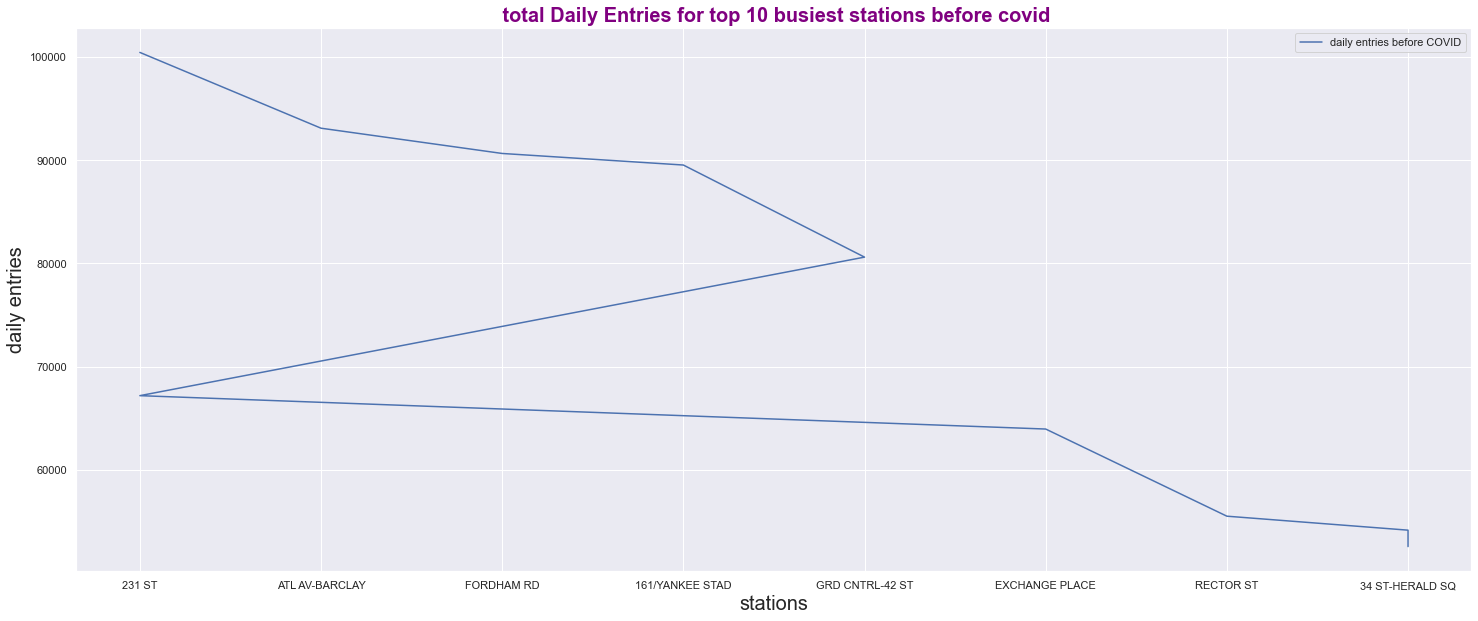

In [536]:
plt.figure(figsize=(25,10))
plt.plot(station_totals_before_E.iloc[0:10]['STATION'],station_totals_before_E['DAILY_ENTRIES'].iloc[0:10],label='daily entries before COVID')
plt.title(' total Daily Entries for top 10 busiest stations before covid',fontsize = 20,weight='bold',color='purple')
plt.xlabel('stations',fontsize=20)
plt.ylabel('daily entries',fontsize=20)
plt.legend()

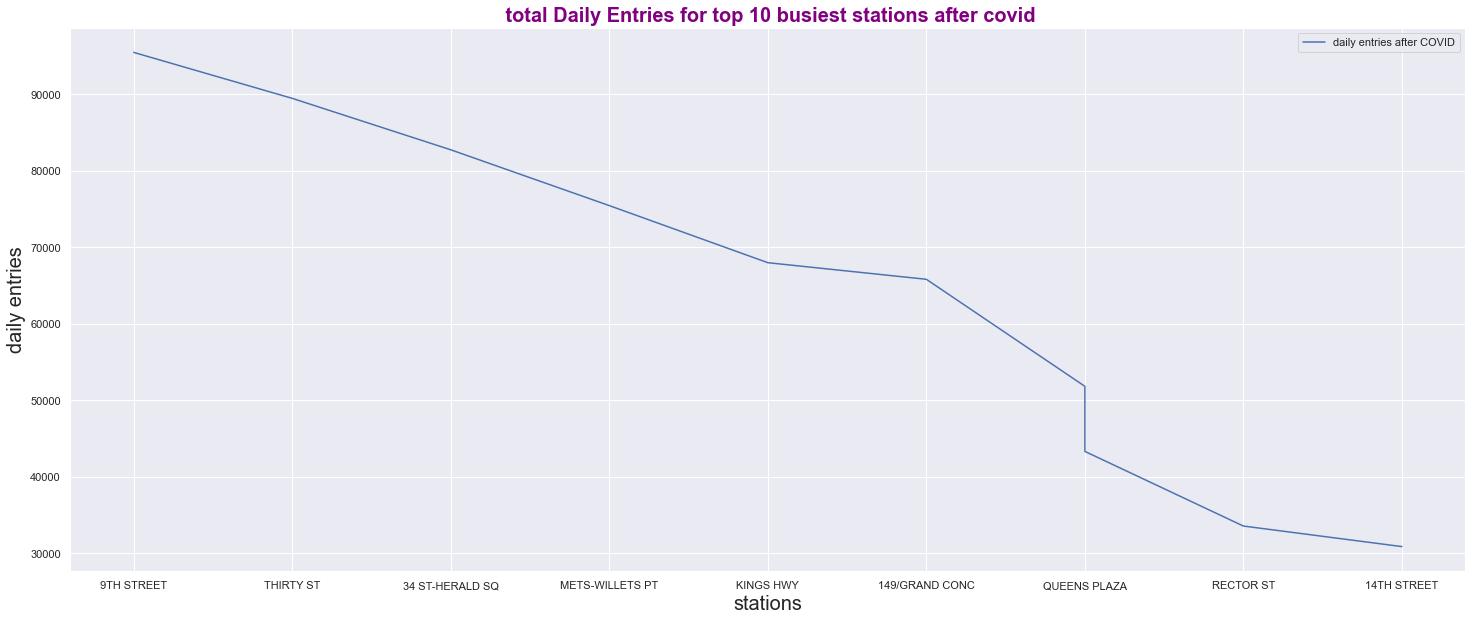

In [535]:
plt.figure(figsize=(25,10))
plt.plot(station_totals_after_E.iloc[0:10]['STATION'],station_totals_after_E['DAILY_ENTRIES'].iloc[0:10],label='daily entries after COVID')
plt.title(' total Daily Entries for top 10 busiest stations after covid',fontsize = 20,weight='bold',color='purple')
plt.xlabel('stations',fontsize=20)
plt.ylabel('daily entries',fontsize=20)
plt.legend()

### the total daily EXITS the busiest stations before covid and after covid

In [488]:
turnstiles_daily_before_X = (turnstiles_df_before
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME","DATE_TIME"],as_index=False)
                        .EXITS.first())

In [489]:
turnstiles_daily_before_X.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,10/26/2019,00:00:00,2019-10-26 00:00:00,2455491
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,2455499
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,2455532
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,2455623
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,2455679


In [490]:
turnstiles_daily_after_X = (turnstiles_df_after
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME","DATE_TIME"],as_index=False)
                        .EXITS.first())

In [491]:
turnstiles_daily_after_X.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,10/31/2020,00:00:00,2020-10-31 00:00:00,2545767
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,2545767
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,2545786
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,2545831
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,2545868


In [492]:
turnstiles_daily_before_X[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_before_X
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-492-ba85e1ec26fb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_before_X[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_before_X


In [493]:
turnstiles_daily_before_X.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,10/26/2019,00:00:00,2019-10-26 00:00:00,2455491,NaN,NaN
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,2455499,10/26/2019,2455491.0
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,2455532,10/26/2019,2455499.0
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,2455623,10/26/2019,2455532.0
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,2455679,10/26/2019,2455623.0


In [494]:
turnstiles_daily_before_X.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
1855078,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,04:00:00,2019-12-27 04:00:00,420,12/27/2019,420.0
1855079,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,08:00:00,2019-12-27 08:00:00,420,12/27/2019,420.0
1855080,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,12:00:00,2019-12-27 12:00:00,420,12/27/2019,420.0
1855081,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,16:00:00,2019-12-27 16:00:00,420,12/27/2019,420.0
1855082,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,20:00:00,2019-12-27 20:00:00,420,12/27/2019,420.0


In [495]:
turnstiles_daily_after_X[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_after_X
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-495-4cd56e9935b2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_after_X[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_after_X


In [496]:
turnstiles_daily_after_X.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,10/31/2020,00:00:00,2020-10-31 00:00:00,2545767,NaN,NaN
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,2545767,10/31/2020,2545767.0
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,2545786,10/31/2020,2545767.0
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,2545831,10/31/2020,2545786.0
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,2545868,10/31/2020,2545831.0


In [497]:
turnstiles_daily_after_X.tail()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
1685311,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,04:00:00,2020-12-25 04:00:00,541,12/25/2020,541.0
1685312,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,08:00:00,2020-12-25 08:00:00,541,12/25/2020,541.0
1685313,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,12:00:00,2020-12-25 12:00:00,541,12/25/2020,541.0
1685314,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,16:00:00,2020-12-25 16:00:00,541,12/25/2020,541.0
1685315,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,20:00:00,2020-12-25 20:00:00,541,12/25/2020,541.0


In [498]:
turnstiles_daily_before_X.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [499]:
turnstiles_daily_before_X.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,2455499,10/26/2019,2455491.0
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,2455532,10/26/2019,2455499.0
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,2455623,10/26/2019,2455532.0
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,2455679,10/26/2019,2455623.0
5,A002,R051,02-00-00,59 ST,10/26/2019,20:00:00,2019-10-26 20:00:00,2455733,10/26/2019,2455679.0


In [500]:
turnstiles_daily_after_X.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [501]:
turnstiles_daily_after_X.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,2545767,10/31/2020,2545767.0
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,2545786,10/31/2020,2545767.0
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,2545831,10/31/2020,2545786.0
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,2545868,10/31/2020,2545831.0
5,A002,R051,02-00-00,59 ST,10/31/2020,20:00:00,2020-10-31 20:00:00,2545895,10/31/2020,2545868.0


In [502]:
positive_exits_mask_before_X = turnstiles_daily_before_X["EXITS"] > turnstiles_daily_before_X["PREV_EXITS"]
positive_exits_mask_before_X

1           True
2           True
3           True
4           True
5           True
           ...  
1855078    False
1855079    False
1855080    False
1855081    False
1855082    False
Length: 1850142, dtype: bool

In [503]:
positive_exits_mask_after_X = turnstiles_daily_after_X["EXITS"] > turnstiles_daily_after_X["PREV_EXITS"]
positive_exits_mask_after_X

1          False
2           True
3           True
4           True
5           True
           ...  
1685311    False
1685312    False
1685313    False
1685314    False
1685315    False
Length: 1680306, dtype: bool

In [504]:
turnstiles_daily_before_X = turnstiles_daily_before_X[positive_exits_mask_before_X]
turnstiles_daily_before_X

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,10/26/2019,04:00:00,2019-10-26 04:00:00,2455499,10/26/2019,2455491.0
2,A002,R051,02-00-00,59 ST,10/26/2019,08:00:00,2019-10-26 08:00:00,2455532,10/26/2019,2455499.0
3,A002,R051,02-00-00,59 ST,10/26/2019,12:00:00,2019-10-26 12:00:00,2455623,10/26/2019,2455532.0
4,A002,R051,02-00-00,59 ST,10/26/2019,16:00:00,2019-10-26 16:00:00,2455679,10/26/2019,2455623.0
5,A002,R051,02-00-00,59 ST,10/26/2019,20:00:00,2019-10-26 20:00:00,2455733,10/26/2019,2455679.0
...,...,...,...,...,...,...,...,...,...,...
1854319,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/27/2019,00:00:00,2019-12-27 00:00:00,395062,12/26/2019,395059.0
1854321,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/27/2019,08:00:00,2019-12-27 08:00:00,395064,12/27/2019,395062.0
1854322,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/27/2019,12:00:00,2019-12-27 12:00:00,395065,12/27/2019,395064.0
1854323,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/27/2019,16:00:00,2019-12-27 16:00:00,395074,12/27/2019,395065.0


In [505]:
turnstiles_daily_after_X = turnstiles_daily_after_X[positive_exits_mask_after_X]
turnstiles_daily_after_X

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,EXITS,PREV_DATE,PREV_EXITS
2,A002,R051,02-00-00,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,2545786,10/31/2020,2545767.0
3,A002,R051,02-00-00,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,2545831,10/31/2020,2545786.0
4,A002,R051,02-00-00,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,2545868,10/31/2020,2545831.0
5,A002,R051,02-00-00,59 ST,10/31/2020,20:00:00,2020-10-31 20:00:00,2545895,10/31/2020,2545868.0
6,A002,R051,02-00-00,59 ST,11/01/2020,00:00:00,2020-11-01 00:00:00,2545902,10/31/2020,2545895.0
...,...,...,...,...,...,...,...,...,...,...
1684567,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/12/2020,20:00:00,2020-12-12 20:00:00,397438,12/12/2020,397437.0
1684575,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/14/2020,04:00:00,2020-12-14 04:00:00,397439,12/14/2020,397438.0
1684584,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/15/2020,16:00:00,2020-12-15 16:00:00,397440,12/15/2020,397439.0
1684608,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/19/2020,16:00:00,2020-12-19 16:00:00,397442,12/19/2020,397440.0


In [506]:
def get_daily_counts_X(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_before_X["DAILY_EXITS"] = turnstiles_daily_before_X.apply(get_daily_counts_X, axis=1, max_counter=100000)

100862803 17809.0
12436530 639759.0
16777216 3.0
303968 3716.0
359173 87346.0
31260771 3647368.0
1845537817 44048.0
489355 104559.0
612228 0.0
1757723 270419.0
10357695 9220227.0
10357699 9220229.0
12961664 2481954.0
9220232 8461560.0
579181 1.0
5062682 807531.0
268478046 1072768.0
385876674 1572091.0
150997444 637689.0
134263590 532392.0
906004132 3547259.0
1074401495 172018598.0


In [507]:
def get_daily_counts_X(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_after_X["DAILY_EXITS"] = turnstiles_daily_after_X.apply(get_daily_counts_X, axis=1, max_counter=100000)

4264025 69721.0
100926127 287640.0
1057252293 100926127.0
285475433 296531.0
1695874966 1378915.0
246883 120976.0
246967 121014.0
541807 232769.0


In [508]:
ca_unit_station_daily_before_X = turnstiles_daily_before_X.groupby(["C/A", "UNIT", "STATION", "DATE","DATE_TIME"])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily_before_X

,C/A,UNIT,STATION,DATE,DATE_TIME,DAILY_EXITS
0,A002,R051,59 ST,10/26/2019,2019-10-26 04:00:00,190.0
1,A002,R051,59 ST,10/26/2019,2019-10-26 08:00:00,539.0
2,A002,R051,59 ST,10/26/2019,2019-10-26 12:00:00,1543.0
3,A002,R051,59 ST,10/26/2019,2019-10-26 16:00:00,1717.0
4,A002,R051,59 ST,10/26/2019,2019-10-26 20:00:00,1714.0
...,...,...,...,...,...,...
372251,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,2019-12-27 04:00:00,3.0
372252,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,2019-12-27 08:00:00,8.0
372253,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,2019-12-27 12:00:00,11.0
372254,TRAM2,R469,RIT-ROOSEVELT,12/27/2019,2019-12-27 16:00:00,44.0


In [509]:
ca_unit_station_daily_after_X = turnstiles_daily_after_X.groupby(["C/A", "UNIT", "STATION", "DATE","TIME","DATE_TIME"])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily_after_X

,C/A,UNIT,STATION,DATE,TIME,DATE_TIME,DAILY_EXITS
0,A002,R051,59 ST,10/31/2020,04:00:00,2020-10-31 04:00:00,21.0
1,A002,R051,59 ST,10/31/2020,08:00:00,2020-10-31 08:00:00,280.0
2,A002,R051,59 ST,10/31/2020,12:00:00,2020-10-31 12:00:00,767.0
3,A002,R051,59 ST,10/31/2020,16:00:00,2020-10-31 16:00:00,702.0
4,A002,R051,59 ST,10/31/2020,20:00:00,2020-10-31 20:00:00,546.0
...,...,...,...,...,...,...,...
325625,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,04:00:00,2020-12-25 04:00:00,3.0
325626,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,08:00:00,2020-12-25 08:00:00,2.0
325627,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,12:00:00,2020-12-25 12:00:00,6.0
325628,TRAM2,R469,RIT-ROOSEVELT,12/25/2020,16:00:00,2020-12-25 16:00:00,9.0


In [510]:
station_daily_before_X = turnstiles_daily_before_X.groupby(["STATION", "DATE","DATE_TIME"])[['DAILY_EXITS']].sum().reset_index()
station_daily_before_X

,STATION,DATE,DATE_TIME,DAILY_EXITS
0,1 AV,10/26/2019,2019-10-26 04:00:00,589.0
1,1 AV,10/26/2019,2019-10-26 08:00:00,493.0
2,1 AV,10/26/2019,2019-10-26 12:00:00,1240.0
3,1 AV,10/26/2019,2019-10-26 16:00:00,1985.0
4,1 AV,10/26/2019,2019-10-26 20:00:00,2529.0
...,...,...,...,...
253411,ZEREGA AV,12/27/2019,2019-12-27 04:00:00,100.0
253412,ZEREGA AV,12/27/2019,2019-12-27 08:00:00,201.0
253413,ZEREGA AV,12/27/2019,2019-12-27 12:00:00,321.0
253414,ZEREGA AV,12/27/2019,2019-12-27 16:00:00,410.0


In [511]:
station_daily_after_X = turnstiles_daily_after_X.groupby(["STATION", "DATE","DATE_TIME"])[['DAILY_EXITS']].sum().reset_index()
station_daily_after_X

,STATION,DATE,DATE_TIME,DAILY_EXITS
0,1 AV,10/31/2020,2020-10-31 04:00:00,164.0
1,1 AV,10/31/2020,2020-10-31 08:00:00,493.0
2,1 AV,10/31/2020,2020-10-31 12:00:00,1341.0
3,1 AV,10/31/2020,2020-10-31 16:00:00,2405.0
4,1 AV,10/31/2020,2020-10-31 20:00:00,2590.0
...,...,...,...,...
220725,ZEREGA AV,12/25/2020,2020-12-25 04:00:00,18.0
220726,ZEREGA AV,12/25/2020,2020-12-25 08:00:00,26.0
220727,ZEREGA AV,12/25/2020,2020-12-25 12:00:00,61.0
220728,ZEREGA AV,12/25/2020,2020-12-25 16:00:00,111.0


In [512]:
station_totals_before_X = station_daily_before_X.groupby(["STATION","DATE_TIME"]).sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()
station_totals_before_X.head()

,STATION,DATE_TIME,DAILY_EXITS
0,ATL AV-BARCLAY,2019-11-16 03:00:00,93363.0
1,PAVONIA/NEWPORT,2019-11-24 10:14:49,87346.0
2,TWENTY THIRD ST,2019-11-08 18:43:51,66552.0
3,34 ST-PENN STA,2019-10-29 20:00:00,53277.0
4,34 ST-PENN STA,2019-11-04 19:00:00,52790.0


In [513]:
station_totals_after_X = station_daily_after_X.groupby(["STATION","DATE_TIME"]).sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals_after_X.head()

,STATION,DATE_TIME,DAILY_EXITS
0,CITY / BUS,2020-12-11 08:59:44,77457.0
1,NEWARK BM BW,2020-11-27 11:11:29,70594.0
2,9TH STREET,2020-12-01 16:41:47,70450.0
3,HOWARD BCH JFK,2020-12-10 23:00:00,69745.0
4,KINGS HWY,2020-12-15 15:00:00,68179.0


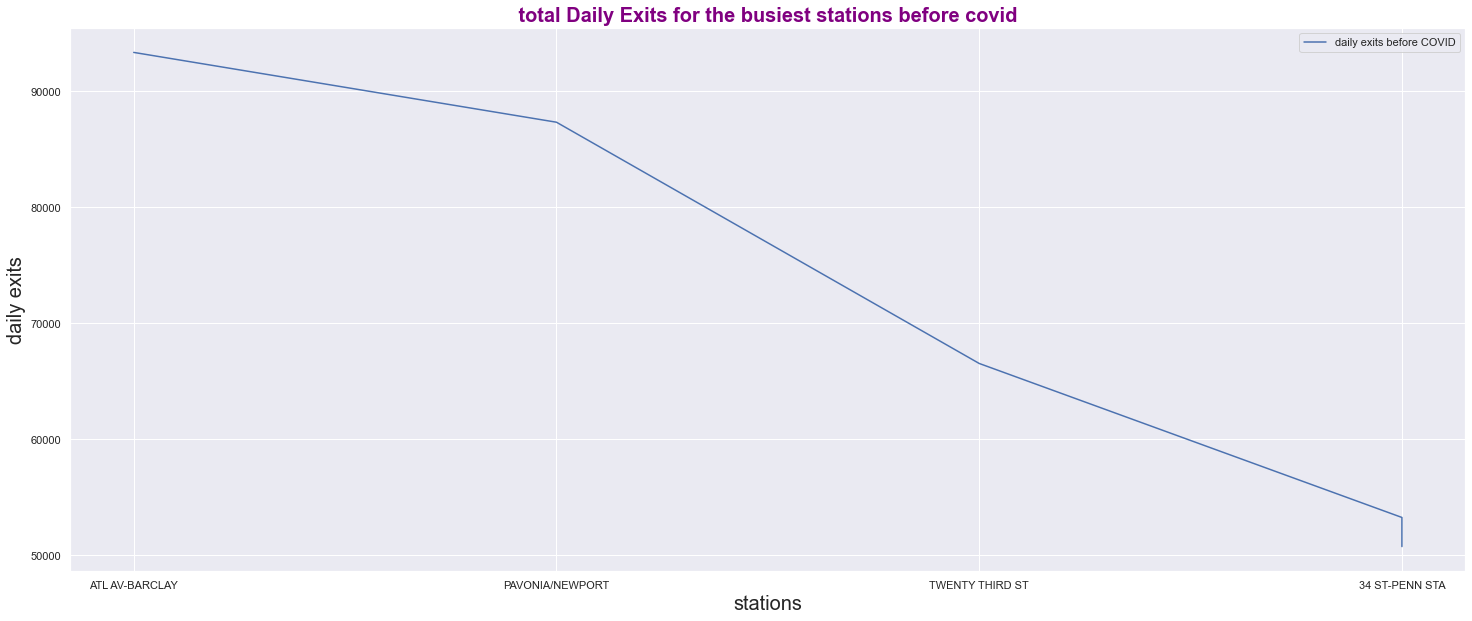

In [537]:
plt.figure(figsize=(25,10))
plt.plot(station_totals_before_X.iloc[0:10]['STATION'],station_totals_before_X.iloc[0:10]['DAILY_EXITS'],label='daily exits before COVID')
plt.title(' total Daily Exits for the busiest stations before covid ',fontsize = 20,weight='bold',color='purple')
plt.xlabel('stations',fontsize=20)
plt.ylabel('daily exits',fontsize=20)
plt.legend()

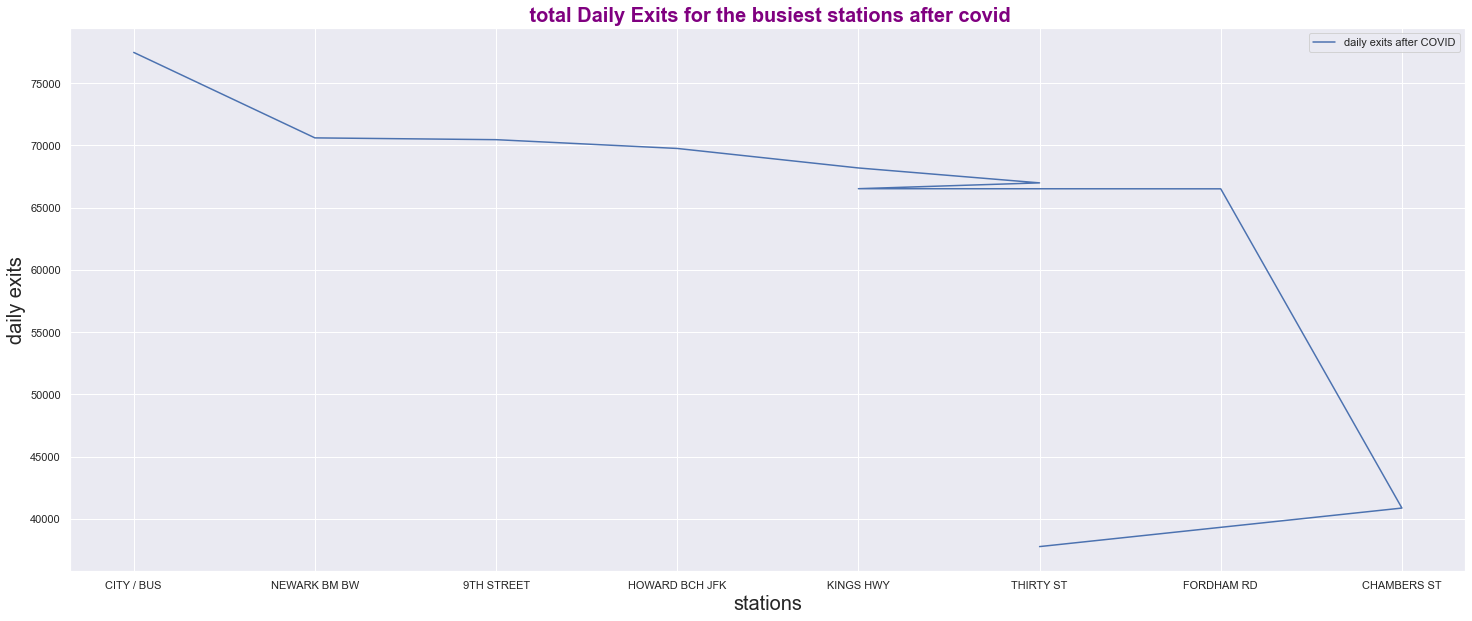

In [538]:
plt.figure(figsize=(25,10))
plt.plot(station_totals_after_X.iloc[0:10]['STATION'],station_totals_after_X.iloc[0:10]['DAILY_EXITS'],label='daily exits after COVID')
plt.title(' total Daily Exits for the busiest stations after covid',fontsize = 20,weight='bold',color='purple')
plt.xlabel('stations',fontsize=20)
plt.ylabel('daily exits',fontsize=20)
plt.legend()

In [539]:
turnstiles_daily_after_E.sort_values('DAILY_ENTRIES',ascending=False)

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME,DAILY_ENTRIES
992472,PTH10,R547,00-00-00,9TH STREET,12/01/2020,17:47:52,2020-12-01 17:47:52,128748,12/01/2020,33295.0,16:41:47,95453.0
1003008,PTH13,R541,00-04-00,THIRTY ST,12/14/2020,23:43:02,2020-12-14 23:43:02,391767,12/14/2020,302320.0,19:46:33,89447.0
814217,N506,R022,00-05-00,34 ST-HERALD SQ,11/15/2020,23:00:00,2020-11-15 23:00:00,720906,11/15/2020,80270.0,19:00:00,80270.0
140879,B023,R211,01-06-02,KINGS HWY,12/15/2020,15:00:00,2020-12-15 15:00:00,328567,12/15/2020,262165.0,11:00:00,66402.0
1371805,R260,R205,01-06-00,149/GRAND CONC,11/06/2020,11:00:00,2020-11-06 11:00:00,524288,11/05/2020,64642.0,07:00:00,64642.0
...,...,...,...,...,...,...,...,...,...,...,...,...
779265,N416,R286,01-06-00,MYRTLE-WILLOUGH,11/26/2020,16:00:00,2020-11-26 16:00:00,955056232,11/25/2020,4994242.0,08:00:00,0.0
582954,N182,R414,00-06-01,HOWARD BCH JFK,12/11/2020,07:00:00,2020-12-11 07:00:00,2563576,12/10/2020,2301353.0,23:00:00,0.0
983873,PTH07,R550,00-00-00,CITY / BUS,11/24/2020,12:48:25,2020-11-24 12:48:25,487191,11/24/2020,158569.0,09:21:44,0.0
983866,PTH07,R550,00-00-00,CITY / BUS,11/23/2020,11:36:25,2020-11-23 11:36:25,486841,11/23/2020,158519.0,08:09:44,0.0


In [540]:
station_daily_after_E['WEEK'] = pd.to_datetime(station_daily_after_E['DATE']).dt.day_name()
station_daily_after_E

,STATION,DATE,TIME,DATE_TIME,DAILY_ENTRIES,WEEK
0,1 AV,10/31/2020,04:00:00,2020-10-31 04:00:00,125.0,Saturday
1,1 AV,10/31/2020,08:00:00,2020-10-31 08:00:00,156.0,Saturday
2,1 AV,10/31/2020,12:00:00,2020-10-31 12:00:00,825.0,Saturday
3,1 AV,10/31/2020,16:00:00,2020-10-31 16:00:00,1774.0,Saturday
4,1 AV,10/31/2020,20:00:00,2020-10-31 20:00:00,2017.0,Saturday
...,...,...,...,...,...,...
206993,ZEREGA AV,12/25/2020,04:00:00,2020-12-25 04:00:00,2.0,Friday
206994,ZEREGA AV,12/25/2020,08:00:00,2020-12-25 08:00:00,72.0,Friday
206995,ZEREGA AV,12/25/2020,12:00:00,2020-12-25 12:00:00,72.0,Friday
206996,ZEREGA AV,12/25/2020,16:00:00,2020-12-25 16:00:00,72.0,Friday


In [541]:
station_daily_agg = (station_daily_after_E[['STATION','DATE','DAILY_ENTRIES','WEEK']]
                        .groupby('WEEK')
                        .sum()
                        .sort_values('DAILY_ENTRIES',ascending=False)
                       )
#MVP 
station_daily_agg.reset_index()

,WEEK,DAILY_ENTRIES
0,Tuesday,13558971.0
1,Wednesday,12927578.0
2,Monday,12778355.0
3,Friday,11801110.0
4,Thursday,11344982.0
5,Saturday,8443718.0
6,Sunday,6623555.0


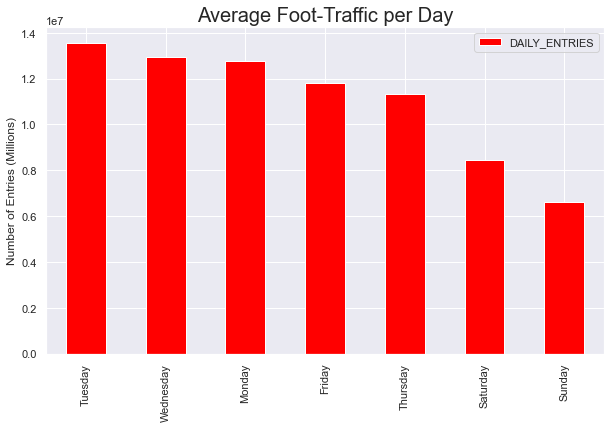

In [542]:
base_color = sns.color_palette()
sns.set(style="darkgrid")
g = station_daily_agg.plot(kind='bar',figsize=(10,6),color='red')
plt.title('Average Foot-Traffic per Day',fontdict={'fontsize':20})
plt.xlabel('')
g.get_legend()
plt.ylabel('Number of Entries (Millions)');

In [543]:
single_turnstile = turnstiles_daily_after_E[(turnstiles_daily_after_E["C/A"] == "A011") & 
(turnstiles_daily_after_E["UNIT"] == "R080") & 
(turnstiles_daily_after_E["SCP"] == "01-00-00") & 
(turnstiles_daily_after_E["STATION"] == "57 ST-7 AV")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_TIME,DAILY_ENTRIES
11373,A011,R080,01-00-00,57 ST-7 AV,10/31/2020,04:00:00,2020-10-31 04:00:00,470068,10/31/2020,470067.0,00:00:00,1.0
11374,A011,R080,01-00-00,57 ST-7 AV,10/31/2020,08:00:00,2020-10-31 08:00:00,470070,10/31/2020,470068.0,04:00:00,2.0
11375,A011,R080,01-00-00,57 ST-7 AV,10/31/2020,12:00:00,2020-10-31 12:00:00,470084,10/31/2020,470070.0,08:00:00,14.0
11376,A011,R080,01-00-00,57 ST-7 AV,10/31/2020,16:00:00,2020-10-31 16:00:00,470111,10/31/2020,470084.0,12:00:00,27.0
11377,A011,R080,01-00-00,57 ST-7 AV,10/31/2020,20:00:00,2020-10-31 20:00:00,470136,10/31/2020,470111.0,16:00:00,25.0


In [544]:
single_turnstile.mean()

<ipython-input-544-66c073642800>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  single_turnstile.mean()


ENTRIES          473172.039394
PREV_ENTRIES     473154.466667
DAILY_ENTRIES        17.572727
dtype: float64

In [545]:
single_turnstile.median()

<ipython-input-545-81142574fcc6>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  single_turnstile.median()


ENTRIES          473271.0
PREV_ENTRIES     473266.5
DAILY_ENTRIES        14.0
dtype: float64

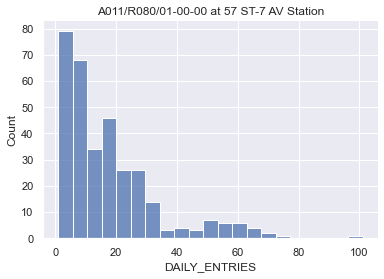

In [546]:
sns.histplot(single_turnstile['DAILY_ENTRIES']).set(title='A011/R080/01-00-00 at 57 ST-7 AV Station');
sns.despine()

In [547]:
station_totals_after_E['DATE_TIME'].dt.hour

0         17
1         23
2         23
3         16
4         15
          ..
206993     9
206994     9
206995    10
206996    12
206997    11
Name: DATE_TIME, Length: 206998, dtype: int64

In [548]:
M=station_totals_after_E[(station_totals_after_E['DATE_TIME'].dt.hour>=6) & (station_totals_after_E['DATE_TIME'].dt.hour<=12)]
M

,STATION,DATE_TIME,DAILY_ENTRIES
5,149/GRAND CONC,2020-11-06 11:00:00,65804.0
38,JOURNAL SQUARE,2020-12-10 07:50:03,11828.0
79,JOURNAL SQUARE,2020-11-17 08:37:20,9624.0
118,JOURNAL SQUARE,2020-11-13 08:01:20,9109.0
155,JOURNAL SQUARE,2020-11-02 11:23:20,8379.0
...,...,...,...
206993,HARRISON,2020-11-08 09:44:55,1.0
206994,HARRISON,2020-11-08 09:40:54,1.0
206995,NEWARK C,2020-11-29 10:26:35,1.0
206996,CITY / BUS,2020-11-24 12:48:25,0.0


In [549]:
M['DATE_TIME'].dt.hour

5         11
38         7
79         8
118        8
155       11
          ..
206993     9
206994     9
206995    10
206996    12
206997    11
Name: DATE_TIME, Length: 67164, dtype: int64

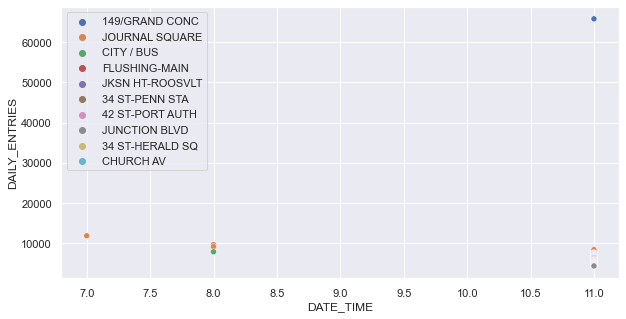

In [550]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=M.iloc[0:180], x=M['DATE_TIME'].dt.hour,y='DAILY_ENTRIES', hue = 'STATION', palette = 'deep', legend ='full', )
plt.legend(loc='upper left')

In [557]:
station_totals_after_E.to_sql("MTAP",con=engine)

In [558]:
data=pd.read_sql('SELECT* FROM MTAP ORDER BY STATION',engine)
data

,index,STATION,DATE_TIME,DAILY_ENTRIES
0,3176,1 AV,2020-11-05 19:00:00.000000,2947.0
1,3350,1 AV,2020-11-10 19:00:00.000000,2890.0
2,3351,1 AV,2020-11-13 19:00:00.000000,2890.0
3,3603,1 AV,2020-11-02 19:00:00.000000,2806.0
4,3639,1 AV,2020-11-06 19:00:00.000000,2796.0
...,...,...,...,...
206993,201274,ZEREGA AV,2020-11-14 04:00:00.000000,1.0
206994,201300,ZEREGA AV,2020-12-16 04:00:00.000000,1.0
206995,201318,ZEREGA AV,2020-12-19 04:00:00.000000,1.0
206996,201385,ZEREGA AV,2020-12-11 04:00:00.000000,1.0


In [559]:
data=pd.read_sql('SELECT* FROM MTAP WHERE STATION="HARRISON"',engine)
data

,index,STATION,DATE_TIME,DAILY_ENTRIES
0,68822,HARRISON,2020-12-01 09:26:41.000000,277.0
1,74917,HARRISON,2020-12-08 09:26:41.000000,236.0
2,76825,HARRISON,2020-12-02 10:38:41.000000,225.0
3,76913,HARRISON,2020-12-04 08:50:41.000000,224.0
4,78922,HARRISON,2020-11-09 09:28:29.000000,213.0
...,...,...,...,...
5511,206953,HARRISON,2020-11-08 04:04:17.000000,1.0
5512,206957,HARRISON,2020-11-08 03:10:05.000000,1.0
5513,206991,HARRISON,2020-11-08 09:57:29.000000,1.0
5514,206993,HARRISON,2020-11-08 09:44:55.000000,1.0


In [560]:
data=pd.read_sql('SELECT STATION FROM MTAP WHERE DAILY_ENTRIES>=200',engine)
data

,STATION
0,9TH STREET
1,THIRTY ST
2,34 ST-HERALD SQ
3,METS-WILLETS PT
4,KINGS HWY
...,...
81250,39 AV
81251,BAY RIDGE AV
81252,HALSEY ST
81253,20 AV
